In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from dredFISH.Utils.__init__plots import * 

In [2]:
pth = './data/mm10/'
!ls $pth
# all: DNA FISH probes
# refseq: RNA FISH (isoform-resolved)
# iso: RNA FISH (isoform-flattened)

mm10_all_newBalance.tsv  mm10_iso_newBalance.tsv  mm10_refseq_newBalance.tsv
mm10_all_newBalance.zip  mm10_iso_newBalance.zip  mm10_refseq_newBalance.zip


In [3]:
!wc -l $pth"mm10_all_newBalance.tsv"
!wc -l $pth"mm10_refseq_newBalance.tsv"
!wc -l $pth"mm10_iso_newBalance.tsv"

33811899 ./data/mm10/mm10_all_newBalance.tsv
2363136 ./data/mm10/mm10_refseq_newBalance.tsv
1175771 ./data/mm10/mm10_iso_newBalance.tsv


In [4]:
# start with isoflat

In [5]:
f = os.path.join(pth, 'mm10_iso_newBalance.tsv')
df = pd.read_csv(f, sep='\t', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,chr1,3214511,3214543,AAAAGCACCATGACCAAGGACACCGAAAACAGA,42.18,100.000,0.000,0,0.423,25,+,Xkr4,1
1,chr1,3214544,3214574,AAGCGGGAATGTTTACTTGCTGTGTGGAGGT,42.07,100.000,0.000,0,0.343,2,+,Xkr4,1
2,chr1,3214624,3214660,TACAAATCTTAGCTGATGGAGTGGTAAGCCCTCAAGC,42.29,100.000,0.000,0,0.176,0,+,Xkr4,1
3,chr1,3214679,3214715,AATGGCATACACATTGCATCTGTATGCTCTCACTTGC,42.18,100.000,0.000,0,0.140,3,+,Xkr4,1
4,chr1,3214738,3214774,AGTAGACACATCATTTTGACCTTGGATGGGAAGAGGG,42.19,100.000,0.000,0,0.192,2,+,Xkr4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175766,chrY,90839212,90839243,GCCTGGCATCATAGCTTTTGGCAGACTTCAGT,42.44,100.000,193.780,0,0.237,3,+,G530011O06Rik,1
1175767,chrY,90839244,90839280,TCTGAGGTTCTGGAACAAGTCAGTCGTTAAGAGGACC,42.94,100.000,200.000,0,0.144,4,+,G530011O06Rik,1
1175768,chrY,90839284,90839319,ACTCCACTCATTCTATTATCACACCAGACAGGTGCC,42.04,99.746,199.492,0,0.119,4,+,G530011O06Rik,1
1175769,chrY,90839320,90839353,TCAGAGACACAGAGATGAGACAGGAGTCCACAGT,42.32,88.791,183.666,0,0.169,6,+,G530011O06Rik,1


In [6]:
df.describe()

,1,2,4,5,6,7,8,9,12
count,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06,1.175771e+06
mean,7.693484e+07,7.693487e+07,4.347671e+01,9.925802e+01,8.405039e+01,6.807448e-02,2.165928e-01,4.090359e+00,1.766804e+00
std,4.445241e+07,4.445241e+07,1.579238e+00,1.283976e+00,4.991625e+02,2.518738e-01,9.529322e-02,2.059826e+01,1.540581e+00
min,2.061730e+05,2.062090e+05,4.201000e+01,8.350200e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.779265e+07,3.779268e+07,4.229000e+01,9.888900e+01,0.000000e+00,0.000000e+00,1.520000e-01,0.000000e+00,1.000000e+00
50%,7.578560e+07,7.578563e+07,4.273000e+01,1.000000e+02,0.000000e+00,0.000000e+00,2.040000e-01,2.000000e+00,1.000000e+00
75%,1.106183e+08,1.106183e+08,4.442000e+01,1.000000e+02,0.000000e+00,0.000000e+00,2.670000e-01,2.000000e+00,2.000000e+00
max,1.951767e+08,1.951767e+08,4.699000e+01,1.000000e+02,9.504485e+03,1.000000e+00,1.000000e+00,2.550000e+02,6.600000e+01


In [7]:
counts = df.groupby(11).size().to_frame()
counts

,0
11,
0610005C13Rik,23
0610009B22Rik,11
0610009E02Rik,9
0610009L18Rik,10
0610010F05Rik,23
...,...
Zyx,38
Zzef1,237
Zzz3,93


In [8]:
output = "./data/mm10_isoflat_counts.csv"
counts.to_csv(output, header=False, index=True)
!head $output

0610005C13Rik,23
0610009B22Rik,11
0610009E02Rik,9
0610009L18Rik,10
0610010F05Rik,23
0610010K14Rik,13
0610012G03Rik,25
0610030E20Rik,86
0610031O16Rik,16
0610038B21Rik,30


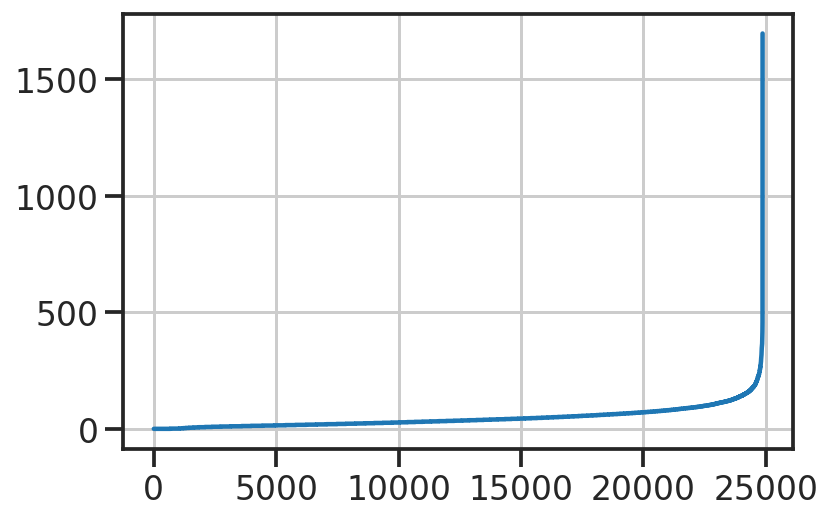

In [9]:
plt.plot(np.sort(counts[0].values))

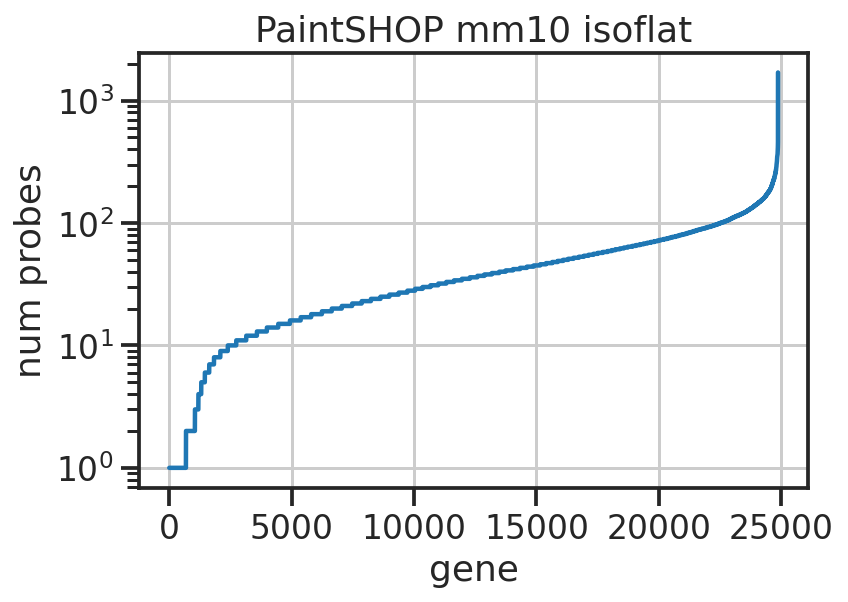

In [10]:
plt.plot(np.sort(counts[0].values))
plt.xlabel('gene')
plt.ylabel('num probes')
plt.title('PaintSHOP mm10 isoflat')

plt.yscale('log')